link https://drive.google.com/file/d/1L_ALX6WjWIIEmv0C1jZN8paM8qz0g_Gg/view?usp=sharing


<span style="color:red;font-size:20px">DATA EXPLORATION AND PRE-PROCESSING</span>


<span style="color:Purple;font-size:16px">DATA LOADING AND BASIC OVERVIEW</span>

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("airbnb.csv")

In [3]:
#shape and first few rows
print("Shape:",df.shape)
print(df.head())

Shape: (74111, 29)
         id  log_price property_type        room_type  \
0   6901257   5.010635     Apartment  Entire home/apt   
1   6304928   5.129899     Apartment  Entire home/apt   
2   7919400   4.976734     Apartment  Entire home/apt   
3  13418779   6.620073         House  Entire home/apt   
4   3808709   4.744932     Apartment  Entire home/apt   

                                           amenities  accommodates  bathrooms  \
0  {"Wireless Internet","Air conditioning",Kitche...             3        1.0   
1  {"Wireless Internet","Air conditioning",Kitche...             7        1.0   
2  {TV,"Cable TV","Wireless Internet","Air condit...             5        1.0   
3  {TV,"Cable TV",Internet,"Wireless Internet",Ki...             4        1.0   
4  {TV,Internet,"Wireless Internet","Air conditio...             2        1.0   

   bed_type cancellation_policy  cleaning_fee  ...   latitude   longitude  \
0  Real Bed              strict          True  ...  40.696524  -73.991617 

In [4]:
#overview of data and missing values
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_verified  73923 non-null

In [5]:
#Summary Statistics
print(df.describe())

                 id     log_price  accommodates     bathrooms      latitude  \
count  7.411100e+04  74111.000000  74111.000000  73911.000000  74111.000000   
mean   1.126662e+07      4.782069      3.155146      1.235263     38.445958   
std    6.081735e+06      0.717394      2.153589      0.582044      3.080167   
min    3.440000e+02      0.000000      1.000000      0.000000     33.338905   
25%    6.261964e+06      4.317488      2.000000      1.000000     34.127908   
50%    1.225415e+07      4.709530      2.000000      1.000000     40.662138   
75%    1.640226e+07      5.220356      4.000000      1.000000     40.746096   
max    2.123090e+07      7.600402     16.000000      8.000000     42.390437   

          longitude  number_of_reviews  review_scores_rating      bedrooms  \
count  74111.000000       74111.000000          57389.000000  74020.000000   
mean     -92.397525          20.900568             94.067365      1.265793   
std       21.705322          37.828641              7.

<span style="color:Purple;font-size:16px">MISSING VALUES AND OUTLIERS</span>

In [6]:
#missing values
print(df.isnull().sum())

id                            0
log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                   200
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   0
first_review              15864
host_has_profile_pic        188
host_identity_verified      188
host_response_rate        18299
host_since                  188
instant_bookable              0
last_review               15827
latitude                      0
longitude                     0
name                          0
neighbourhood              6872
number_of_reviews             0
review_scores_rating      16722
thumbnail_url              8216
zipcode                     968
bedrooms                     91
beds                        131
dtype: int64


In [7]:
#Drop columns that are not useful for prediction
df.drop(['id','name','description','thumbnail_url','host_response_rate','host_since'],axis=1,inplace=True)

In [8]:
print(df.isnull().sum())

log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                   200
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
first_review              15864
host_has_profile_pic        188
host_identity_verified      188
instant_bookable              0
last_review               15827
latitude                      0
longitude                     0
neighbourhood              6872
number_of_reviews             0
review_scores_rating      16722
zipcode                     968
bedrooms                     91
beds                        131
dtype: int64


In [10]:
#Fill missing numerical columns
for col in ['bathrooms','bedrooms','beds','review_scores_rating']:
    df[col].fillna(df[col].median(),inplace=True)
#Fill missing categorical columns
df['host_identity_verified'].fillna(df['host_identity_verified'].mode()[0],inplace=True)
df['host_has_profile_pic'].fillna(df['host_has_profile_pic'].mode()[0],inplace=True)
df['neighbourhood'].fillna("Unknown",inplace=True)
df['zipcode'].fillna("Unknown",inplace=True)

In [11]:
print(df[['first_review','last_review']].head())

  first_review last_review
0   18-06-2016  18-07-2016
1   05-08-2017  23-09-2017
2   30-04-2017  14-09-2017
3          NaN         NaN
4   12-05-2015  22-01-2017


In [12]:
import numpy as np
df['price'] = np.exp(df['log_price'])


In [13]:
#Extracting useful features from first_review & Last_review
from datetime import datetime

#Convert to datetime
df['first_review'] = pd.to_datetime(df['first_review'])
df['last_review'] = pd.to_datetime(df['last_review'])


C:\Users\leepa\AppData\Local\Temp\ipykernel_25004\3091176660.py:5: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['first_review'] = pd.to_datetime(df['first_review'])
C:\Users\leepa\AppData\Local\Temp\ipykernel_25004\3091176660.py:6: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['last_review'] = pd.to_datetime(df['last_review'])


In [14]:
#Max date in the last_review column to get the today date
today = df['last_review'].max()
print("Using this as 'today':",today)

Using this as 'today': 2017-12-09 00:00:00


In [15]:
#calculating two features
df['days_since_last_review'] = (today-df['last_review']).dt.days
df['listing_age_days'] = (today-df['first_review']).dt.days

In [16]:
#filling missing values  with median
df['days_since_last_review'].fillna(df['days_since_last_review'].median(),inplace=True)
df['listing_age_days'].fillna(df['listing_age_days'].median(),inplace=True)

#Drop the original date columns
df.drop(['first_review','last_review'],axis=1,inplace=True)

In [17]:
df['amenity_count'] = df['amenities'].apply(lambda x: len(x.split(',')))
df.drop('amenities',axis=1,inplace=True)

<span style="color:Purple;font-size:16px">TREND ANALYSIS EDA</span>

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

Price Distribution

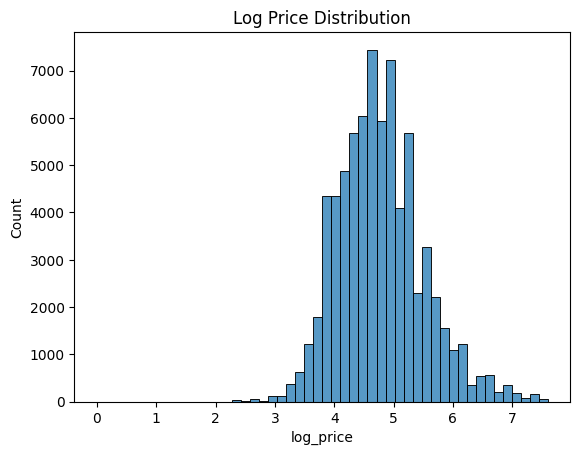

In [19]:
sns.histplot(df['log_price'],bins=50)
plt.title("Log Price Distribution")
plt.show()

Room Type Trend

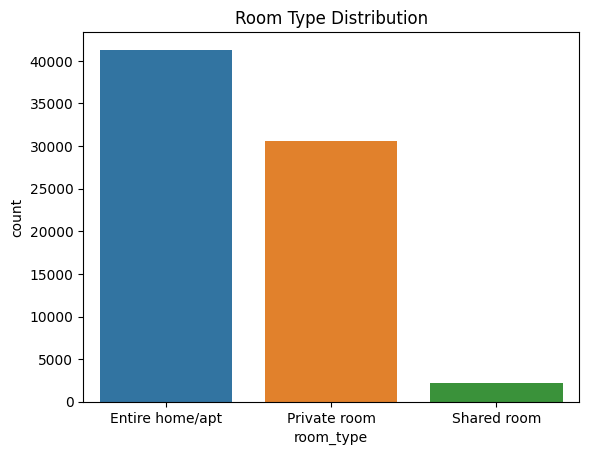

In [20]:
sns.countplot(data=df,x='room_type')
plt.title("Room Type Distribution")
plt.show()

Box-Plot Price vs Room type

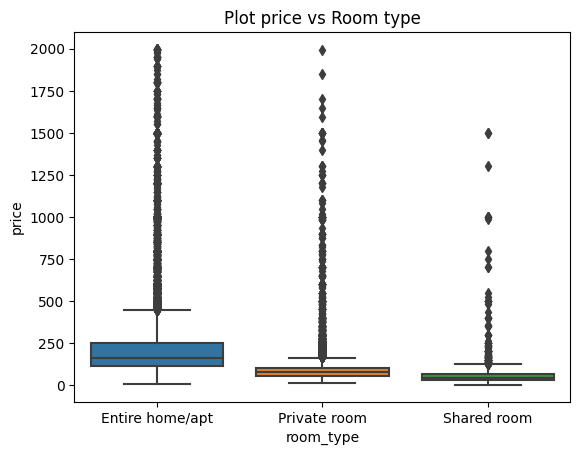

In [21]:
sns.boxplot(x='room_type',y='price',data=df)
plt.title("Plot price vs Room type")
plt.show()

Correlation Heat-Map

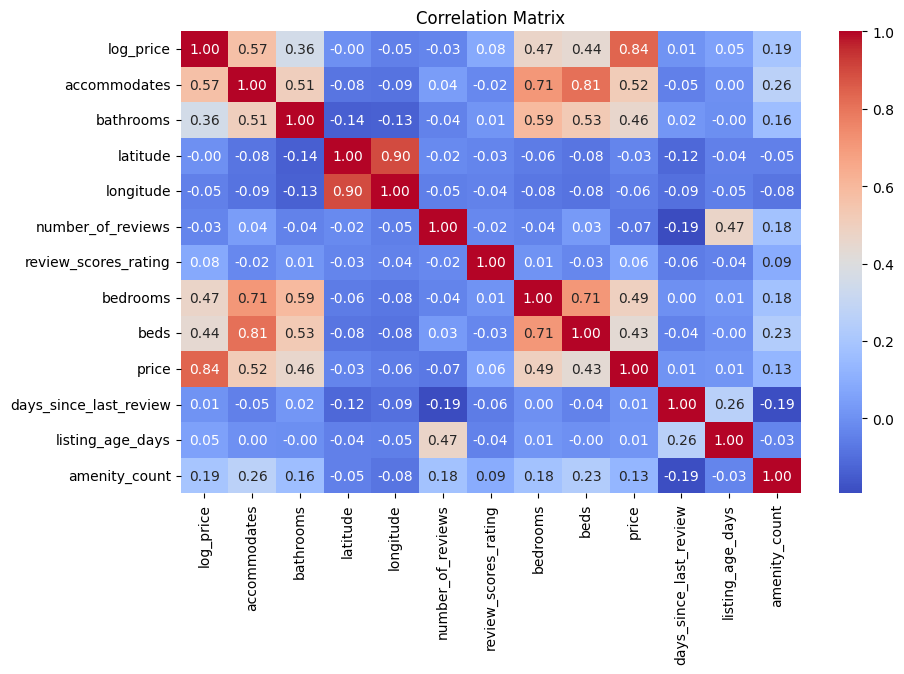

In [22]:
numeric_df = df.select_dtypes(include='number')
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(),annot=True,fmt=".2f",cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

Outliers

In [23]:
#checking percentiles for price related features
print(df[['accommodates','bathrooms','bedrooms','beds']].describe(percentiles=[.25,.5,.75,.90,.95,.99]))

       accommodates     bathrooms      bedrooms          beds
count  74111.000000  74111.000000  74111.000000  74111.000000
mean       3.155146      1.234628      1.265467      1.709611
std        2.153589      0.581386      0.851671      1.253389
min        1.000000      0.000000      0.000000      0.000000
25%        2.000000      1.000000      1.000000      1.000000
50%        2.000000      1.000000      1.000000      1.000000
75%        4.000000      1.000000      1.000000      2.000000
90%        6.000000      2.000000      2.000000      3.000000
95%        7.000000      2.000000      3.000000      4.000000
99%       12.000000      3.500000      4.000000      6.000000
max       16.000000      8.000000     10.000000     18.000000


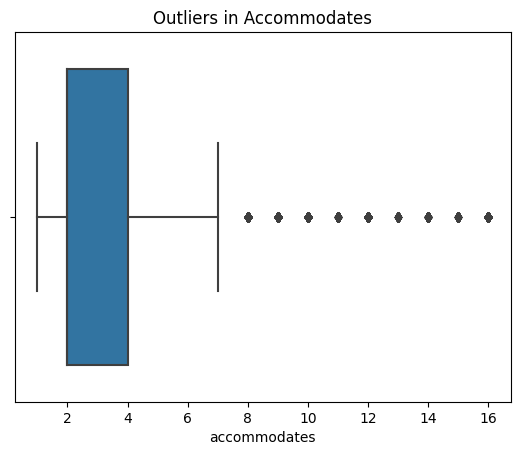

In [24]:
sns.boxplot(data=df, x='accommodates')
plt.title("Outliers in Accommodates")
plt.show()

In [25]:
df = df[df['accommodates'] <= 12]
df = df[df['bathrooms'] <= 3.5]
df = df[df['bedrooms'] <= 4]
df = df[df['beds'] <= 6]

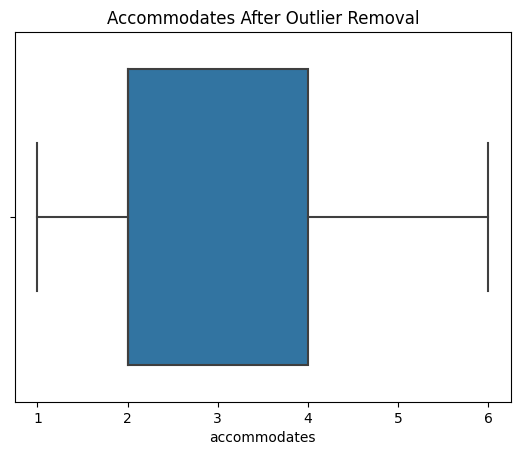

In [26]:
sns.boxplot(data=df[df['accommodates'] <= 6], x='accommodates')
plt.title("Accommodates After Outlier Removal")
plt.show()

PRE-PROCESSING AND TRANSFORMATION

In [52]:
from sklearn.preprocessing import StandardScaler
binary_cols = ['instant_bookable','host_identity_verified','host_has_profile_pic']
for col in binary_cols:
    df[col] = df[col].map({'t':1,'f':0})

#One-hot encode categoricals
df= pd.get_dummies(df,columns=['room_type','property_type','bed_type','cancellation_policy'],drop_first=True)

#Scale numeric features
numeric_cols = df.select_dtypes(include='number').columns.tolist()
numeric_cols.remove('log_price')

scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

KeyError: "None of [Index(['room_type', 'property_type', 'bed_type', 'cancellation_policy'], dtype='object')] are in the [columns]"

<span style="color:Purple;font-size:16px">BUILDING LINEAR REGRESSION MODEL</span>

In [53]:
X.select_dtypes(include='object').columns


Index(['city', 'neighbourhood', 'zipcode'], dtype='object')

In [54]:
X = X.drop(['city', 'neighbourhood', 'zipcode'], axis=1)

In [55]:
print(X.select_dtypes(include='object').columns)  # should be empty

Index([], dtype='object')


In [61]:
# STEP 1: Clean your DataFrame
df_cleaned = df.copy()

# Drop the problematic object (string) columns
df_cleaned = df_cleaned.drop(['city', 'neighbourhood', 'zipcode'], axis=1)

# STEP 2: Convert binary columns from 't'/'f' to 1/0
binary_cols = ['instant_bookable', 'host_identity_verified', 'host_has_profile_pic']
for col in binary_cols:
    if col in df_cleaned.columns:
        df_cleaned[col] = df_cleaned[col].map({'t': 1, 'f': 0})

# STEP 3: Define Features (X) and Target (y)
X = df_cleaned.drop(['log_price', 'Price'], axis=1, errors='ignore')
y = df_cleaned['log_price']

# Check for remaining object columns (should be none)
print("Object columns in X:", X.select_dtypes(include='object').columns)


Object columns in X: Index([], dtype='object')


In [64]:
print(X.isnull().sum().sort_values(ascending=False).head(10))


host_has_profile_pic                72686
host_identity_verified              72686
instant_bookable                    72686
accommodates                            0
property_type_Loft                      0
property_type_Timeshare                 0
property_type_Tent                      0
property_type_Serviced apartment        0
property_type_Parking Space             0
property_type_Other                     0
dtype: int64


In [65]:
binary_cols = ['host_has_profile_pic', 'host_identity_verified', 'instant_bookable']

for col in binary_cols:
    if col in X.columns:
        X[col] = X[col].fillna(0)


In [66]:
print(X.isnull().sum().sum())  # should print 0


0


In [67]:
from sklearn.model_selection import train_test_split

# Split into train and test (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Check the shape
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)


X_train: (58148, 60)
X_test: (14538, 60)
y_train: (58148,)
y_test: (14538,)


In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# 1. Initialize the model
lr_model = LinearRegression()

# 2. Fit the model
lr_model.fit(X_train, y_train)

# 3. Predict on test set
y_pred = lr_model.predict(X_test)

# 4. Evaluate
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 5. Print results
print(f"Linear Regression Results:")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R² Score: {r2:.4f}")

Linear Regression Results:
RMSE: 0.2934
MAE: 0.2167
R² Score: 0.8202


In [69]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Step 1: Convert log_price back to actual price
actual_price = np.exp(y_test)
predicted_price = np.exp(y_pred)

# Step 2: Evaluate in actual price units
rmse_price = np.sqrt(mean_squared_error(actual_price, predicted_price))
mae_price = mean_absolute_error(actual_price, predicted_price)
r2_price = r2_score(actual_price, predicted_price)

print(f"\nEvaluation in Actual Price Units:")
print(f"RMSE: ₹{rmse_price:.2f}")
print(f"MAE: ₹{mae_price:.2f}")
print(f"R² Score: {r2_price:.4f}")



Evaluation in Actual Price Units:
RMSE: ₹519.49
MAE: ₹57.30
R² Score: -11.2337


In [70]:
import pandas as pd

comparison_df = pd.DataFrame({
    'Actual Price (₹)': actual_price.round(2),
    'Predicted Price (₹)': predicted_price.round(2)
})

print(comparison_df.head(10))


       Actual Price (₹)  Predicted Price (₹)
57323              99.0                77.58
38326              76.0                76.94
31585              75.0                68.53
37689             277.0               181.88
73789             199.0               173.67
15403              60.0                63.64
28555             300.0               252.22
64082             120.0               124.07
730               350.0               293.47
32747              50.0                66.24


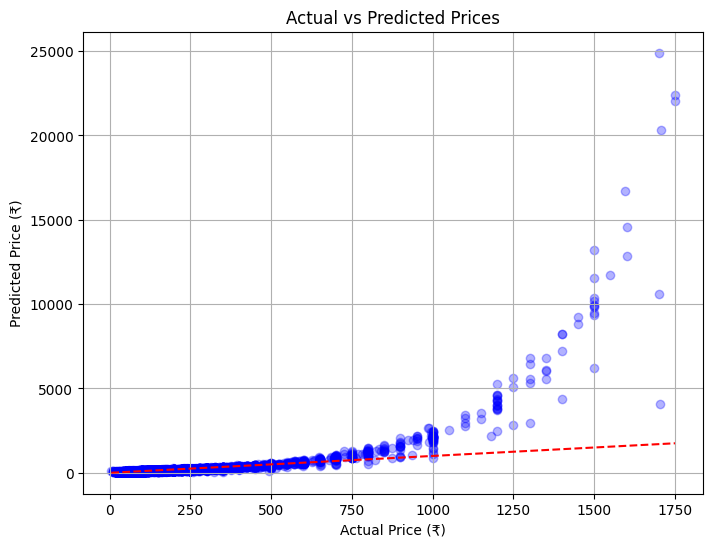

In [71]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(actual_price, predicted_price, alpha=0.3, color='blue')
plt.plot([actual_price.min(), actual_price.max()], [actual_price.min(), actual_price.max()], 'r--')
plt.xlabel("Actual Price (₹)")
plt.ylabel("Predicted Price (₹)")
plt.title("Actual vs Predicted Prices")
plt.grid(True)
plt.show()
